# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [297]:
# pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [298]:
# pip install --upgrade plotly

### Import Statements

In [299]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [300]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [301]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [302]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [303]:
df_data.shape

(4324, 9)

In [304]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [305]:
df_data.isna().sum().any()

True

In [306]:
df_data = df_data.dropna(subset=[col for col in df_data.columns if col != 'Price'])

In [307]:
try:
    df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
except:
    pass
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [308]:
df_data['Price'] = df_data['Price'].str.replace(',', '').astype(float)
df_data['Price']

,Price
0,50.00
1,29.75
2,NaN
3,65.00
4,145.00
...,...
4319,NaN
4320,NaN
4321,NaN
4322,NaN


In [309]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

## Descriptive Statistics

In [310]:
df_data.dtypes

,0
Organisation,object
Location,object
Date,"datetime64[ns, UTC]"
Detail,object
Rocket_Status,object
Price,float64
Mission_Status,object


In [311]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [312]:
launches_company = df_data.groupby('Organisation').size().sort_values(ascending=True)
launches_company = launches_company.reset_index(name='Launches')

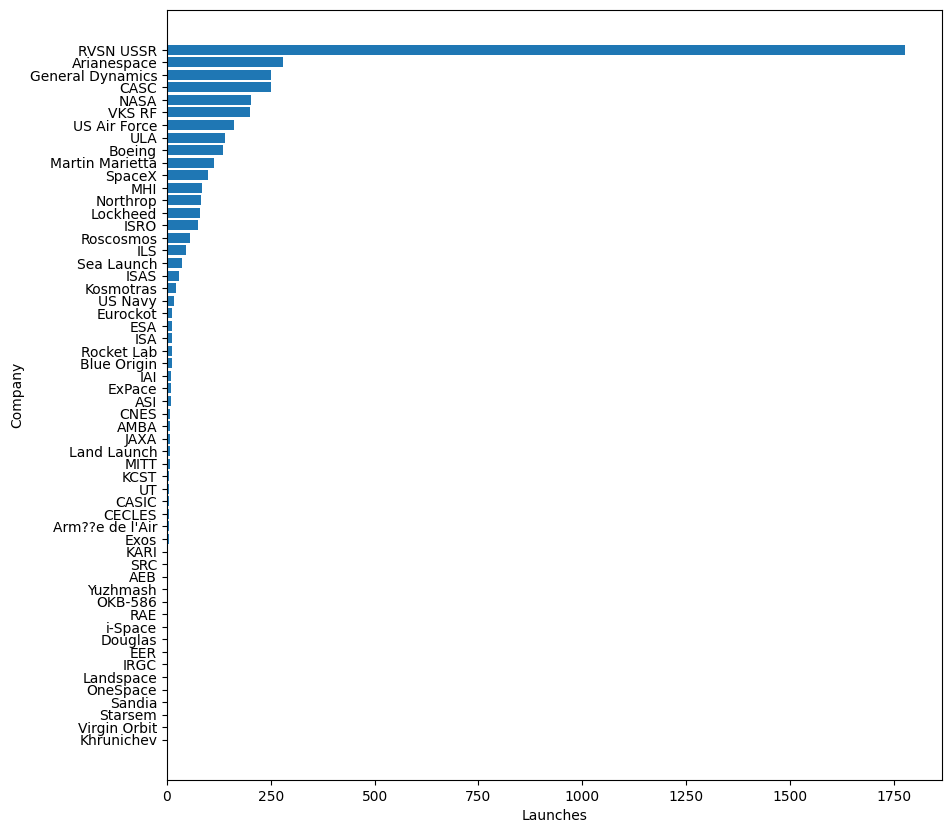

In [313]:
plt.figure(figsize=(10, 10))
plt.barh(launches_company.Organisation, launches_company.Launches)
plt.xlabel('Launches')
plt.ylabel('Company')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [314]:
df_data["Rocket_Status"].value_counts()

,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


<Axes: ylabel='Rocket_Status'>

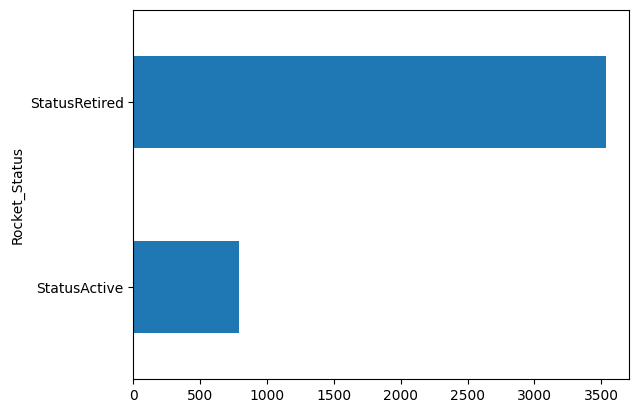

In [315]:
df_data["Rocket_Status"].value_counts().sort_values().plot(kind="barh")

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [316]:
df_data["Mission_Status"].value_counts()

,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

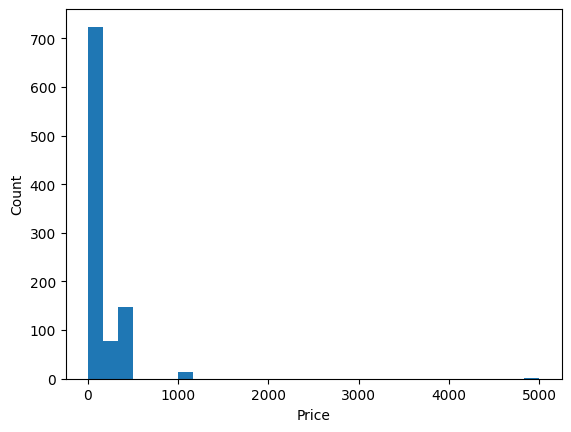

In [317]:
plt.hist(df_data.Price, bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [318]:
import iso3166
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]
df_data.groupby('Country').size()

,0
Country,
Australia,6
Barents Sea,3
Brazil,3
China,268
France,303
Gran Canaria,2
India,76
Iran,13
Israel,11


In [319]:
corrections = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    'Iran': 'Iran, Islamic Republic of',
    'South Korea': 'Korea, Republic of',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'Kazakhstan': 'Russian Federation'
}

df_data["Country"] = df_data["Country"].replace(corrections)
countries = {country.name: key for key, country in iso3166.countries_by_alpha3.items()}
df_data["Country"] = df_data["Country"].replace(countries)
launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')

world_map = px.choropleth(
    launches,
    locations="Country",
    color="counts",
    color_continuous_scale=px.colors.sequential.matter
)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [320]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')

failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum().reset_index()

world_map = px.choropleth(
    failures,
    locations="Country",
    color="counts",
    color_continuous_scale=px.colors.sequential.matter
)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [321]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [322]:
money_spent = df_data[df_data["Price"].notna()]

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False, inplace=True)
total_money_spent

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


# Analyse the Amount of Money Spent by Organisation per Launch

In [323]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False, inplace=True)
organisation_expense

,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00
7,ILS,101.54
12,MHI,95.47
13,Martin Marietta,80.16
22,US Air Force,59.65
9,JAXA,56.00


# Chart the Number of Launches per Year

In [344]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data['Year'] = df_data['Date'].apply(lambda datetime: datetime.year)

ds = df_data['Year'].value_counts().reset_index()
ds.columns = ['Year', 'Count']

fig = px.bar(
    ds,
    x='Year',
    y='Count',
    orientation='v',
    title='Missions number by year',
    height=600
)

fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [325]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data['Month'] = df_data['Date'].dt.month_name()

ds = df_data['Month'].value_counts().reset_index()
ds.columns = ['Month', 'Count']

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ds['Month'] = pd.Categorical(ds['Month'], categories=order, ordered=True)
ds = ds.sort_values('Month')

fig = px.bar(
    ds,
    x='Month',
    y='Count',
    orientation='v',
    title='Missions number by month',
    height=600
)

fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [326]:
most_launches = ds['Count'].max()
print("Most launches in a month =", most_launches)

ds.sort_values(by="Count", ascending=False)
ds.max()

Most launches in a month = 430


,0
Month,December
Count,430


In [327]:
least_launches = ds['Count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 265


,0
Month,January
Count,265


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

<Axes: title={'center': 'Average Price by Year'}, xlabel='Year'>

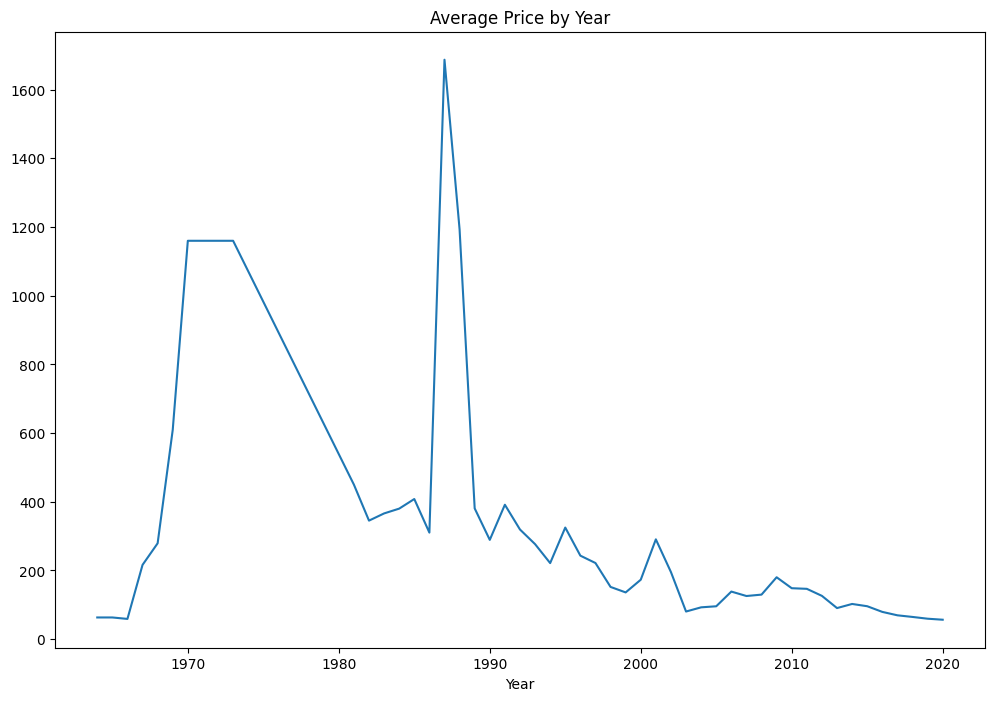

In [329]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
avg_price = df_data[df_data['Price'].notna()]
pd.options.mode.chained_assignment = None

avg_price_grouped = avg_price.groupby('Year')['Price'].mean()
avg_price_grouped.plot(figsize=(12, 8), title='Average Price by Year')

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [330]:
top_10_org = df_data.groupby('Organisation').size().sort_values(ascending=False).head(10).index
df_top_10 = df_data[df_data['Organisation'].isin(top_10_org)]
launch_counts = df_top_10.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

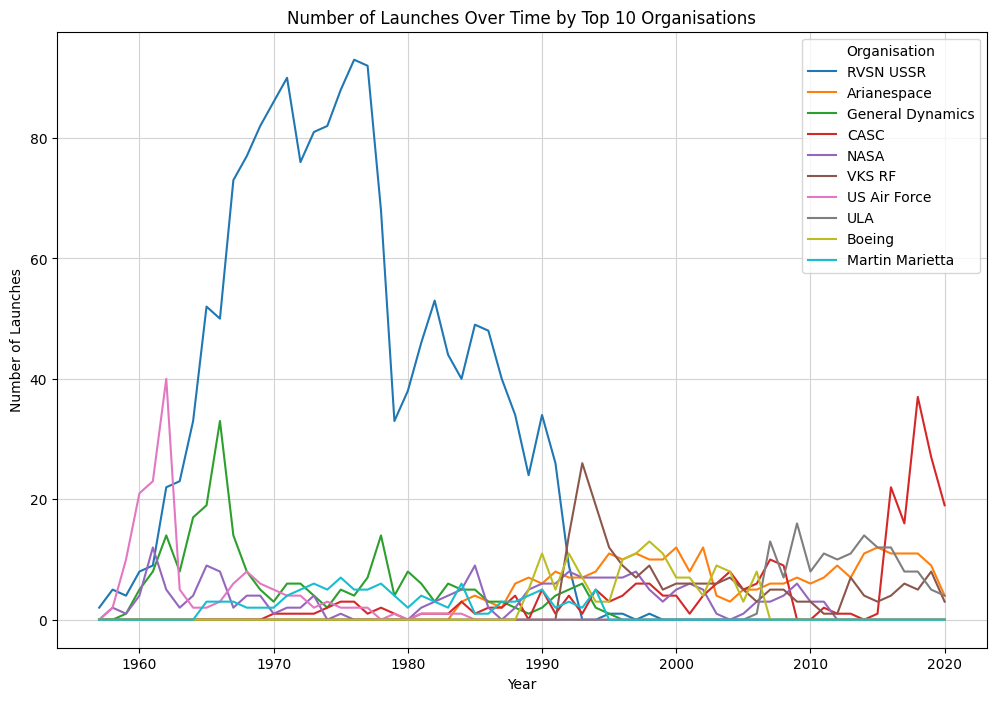

In [331]:
plt.figure(figsize=(12, 8))
for org in top_10_org:
    plt.plot(launch_counts.index, launch_counts[org], linestyle='-', label=org)

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation')
plt.grid(c='lightgray')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [332]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]

In [333]:
cold_war = Or_df.sort_values("Date")
cold_war = cold_war[(cold_war.Year <= 1991)]
cold_war.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,"1,957.00",October
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,"1,957.00",November
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,"1,957.00",December
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,"1,958.00",February
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,"1,958.00",February


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [334]:
launches_cold_war = cold_war["Country"].value_counts().rename_axis("Country").reset_index(name='Counts')
launches_cold_war

,Country,Counts
0,RUS,1709
1,USA,644


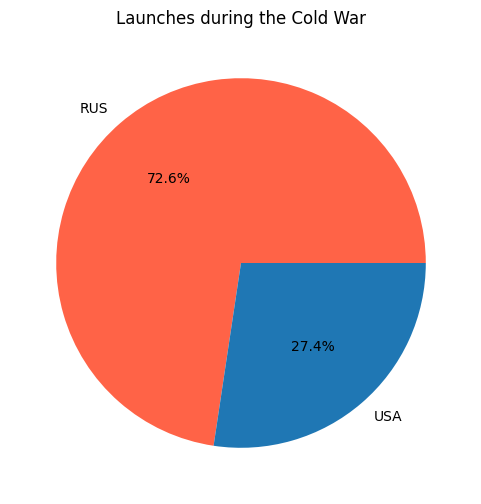

In [335]:
colors = ['tomato', 'tab:blue']
plt.figure(figsize=(6, 6))
plt.pie(launches_cold_war['Counts'], labels=launches_cold_war['Country'], autopct='%1.1f%%', colors=colors)
plt.title('Launches during the Cold War')
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: title={'center': 'Number of Launches Over Time'}, xlabel='Year'>

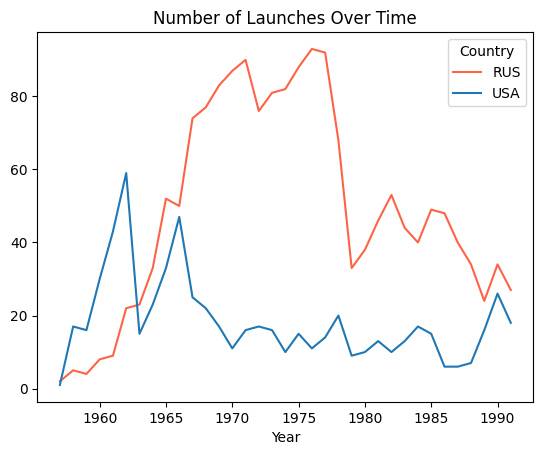

In [336]:
cold_war.groupby(["Year", "Country"]).size().unstack().plot(color=colors, title='Number of Launches Over Time')

## Chart the Total Number of Mission Failures Year on Year.

In [337]:
df_failure_cold_war = cold_war[cold_war['Mission_Status'].str.contains("Failure")]
df_failure_cold_war.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,"1,957.00",December
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,"1,958.00",February
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,"1,958.00",March
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,RUS,"1,958.00",April
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00+00:00,Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA,"1,958.00",April


<Axes: title={'center': 'Number of Mission Failures Over Time'}, xlabel='Year'>

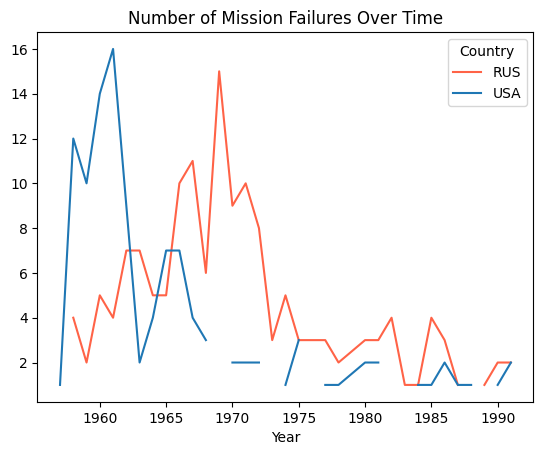

In [338]:
df_failure_cold_war.groupby(["Year", "Country"]).size().unstack().plot(color=colors, title='Number of Mission Failures Over Time')

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

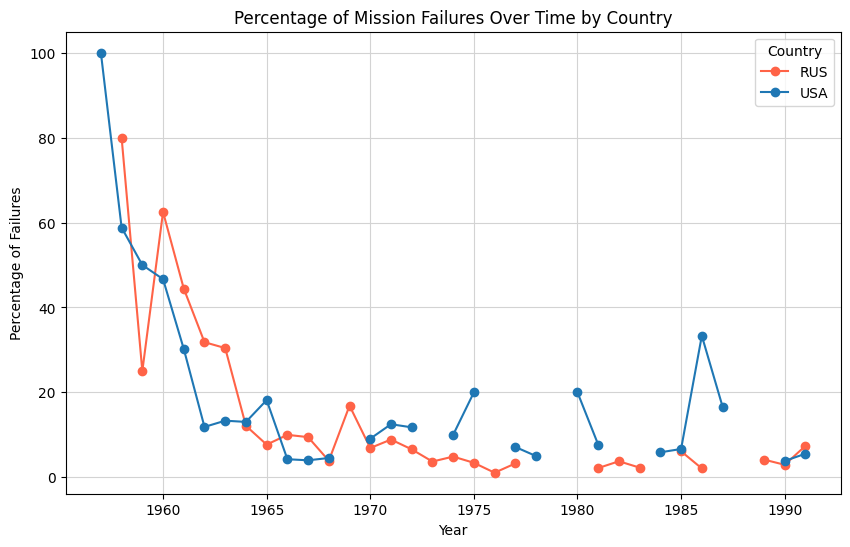

In [339]:
status_by_year_country = cold_war.groupby(["Year", "Country", "Mission_Status"]).size().unstack()

status_by_year_country['Failure_Percentage'] = status_by_year_country['Failure'] / status_by_year_country.sum(axis=1) * 100

plt.figure(figsize=(10, 6))
colors = {'USA': 'tab:blue', 'RUS': 'tomato'}
for country in status_by_year_country.index.get_level_values('Country').unique():
    plt.plot(status_by_year_country.loc[(slice(None), country), :].index.get_level_values('Year'),
             status_by_year_country.loc[(slice(None), country), 'Failure_Percentage'],
             marker='o', linestyle='-', label=country, color=colors[country])

plt.title('Percentage of Mission Failures Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Percentage of Failures')
plt.legend(title='Country')
plt.grid(c='lightgray')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [340]:
# Total Number of Launches
country_launches = df_data.groupby("Year")["Country"].value_counts().rename_axis(["Year", "Country"]).reset_index(name='Counts')
country_leaders = country_launches.loc[country_launches.groupby("Year")["Counts"].idxmax()].reset_index(drop=True)

country_leaders

,Year,Country,Counts
0,"1,957.00",RUS,2
1,"1,958.00",USA,17
2,"1,959.00",USA,16
3,"1,960.00",USA,30
4,"1,961.00",USA,43
...,...,...,...
59,"2,016.00",USA,25
60,"2,017.00",USA,29
61,"2,018.00",CHN,39
62,"2,019.00",CHN,34


In [341]:
# Successful Number of Launches
successful_missions = df_data[df_data['Mission_Status'] == 'Success']
country_launches = successful_missions.groupby("Year")["Country"].value_counts().rename_axis(["Year", "Country"]).reset_index(name='Counts')
country_leaders = country_launches.loc[country_launches.groupby("Year")["Counts"].idxmax()].reset_index(drop=True)

country_leaders

,Year,Country,Counts
0,"1,957.00",RUS,2
1,"1,958.00",USA,5
2,"1,959.00",USA,6
3,"1,960.00",USA,16
4,"1,961.00",USA,27
...,...,...,...
59,"2,016.00",USA,24
60,"2,017.00",USA,29
61,"2,018.00",CHN,38
62,"2,019.00",CHN,32


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [342]:
org_launches = df_data.groupby("Year")["Organisation"].value_counts().rename_axis(["Year", "Organisation"]).reset_index(name='Counts')
max_per_year = org_launches.loc[org_launches.groupby("Year")["Counts"].idxmax()]

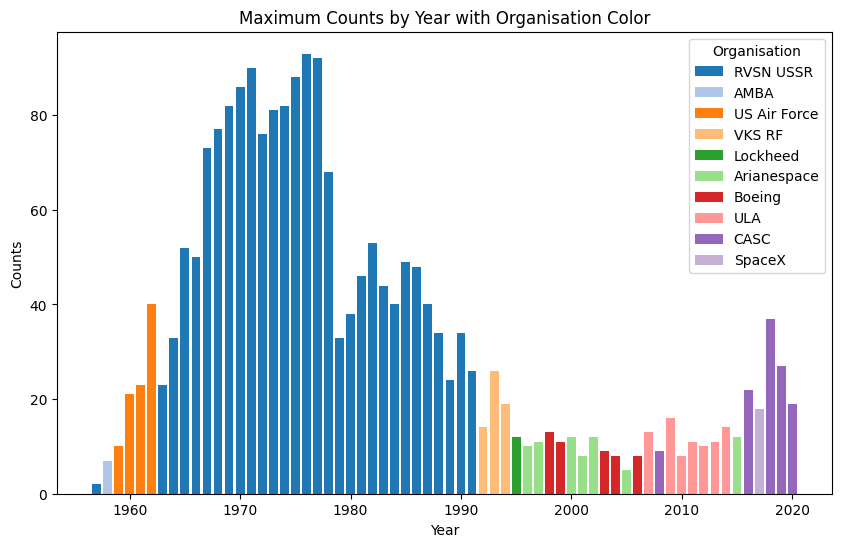

In [343]:
unique_organisations = max_per_year['Organisation'].unique()
colors = plt.cm.tab20(range(len(unique_organisations)))
color_map = dict(zip(unique_organisations, colors))

plt.figure(figsize=(10, 6))
for _, row in max_per_year.iterrows():
    plt.bar(row['Year'], row['Counts'], color=color_map[row['Organisation']], label=row['Organisation'])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Organisation")

plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Maximum Counts by Year with Organisation Color')
plt.show()